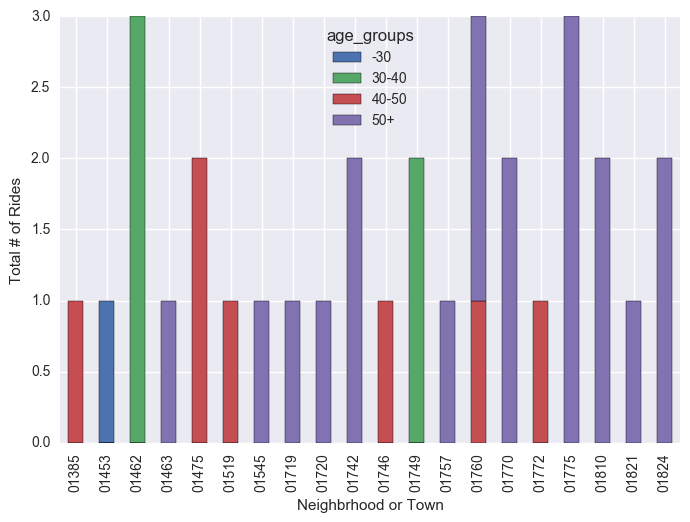

In [5]:
import os
import requests
import json
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from datetime import date,datetime
import calendar
import seaborn as sns
import zipcode
api_key = os.environ['api_key']
username="uppalapati.kn"
def get_df(url):
    resp = requests.get(url)
    data = resp.json().get('objects')
    return pd.DataFrame(data)
trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
{0}&api_key={1}&start_date__gte=2011-01-01&end_date__lte=2013-08-31&limit=10000".format(username, api_key)
df_trips = get_df(trip_url)
df_trips.to_csv(os.path.join('..',"data","analysis3.csv"))
df_trips['age'] = map(lambda x:2017-x,df_trips['birth_date'])
age_group=[]
for age in df_trips['age'].values:
    if age>50:
        age_group.append('50+')
    elif age>40 and age<50:
        age_group.append("40-50")
    elif age>30 and age<40:
        age_group.append("30-40")
    else:
        age_group.append("-30")
df_trips['age_groups']=age_group
df_trips['zip_code'] = map(str,df_trips['zip_code'].values)
group_zip_agegroup_count = df_trips.groupby(['zip_code', 'age_groups'])['bike_nr'].count().unstack('age_groups').fillna(0)
group_zip_agegroup_count.head(20).to_csv("analysis3_1.csv")
group_zip_agegroup_count.head(20).plot(kind='bar', stacked=True)
plt.xlabel('Neighbrhood or Town')
plt.ylabel("Total # of Rides")
plt.savefig(os.path.join("..",'extra','analysis3.png'),bbox_inches='tight')
plt.show()

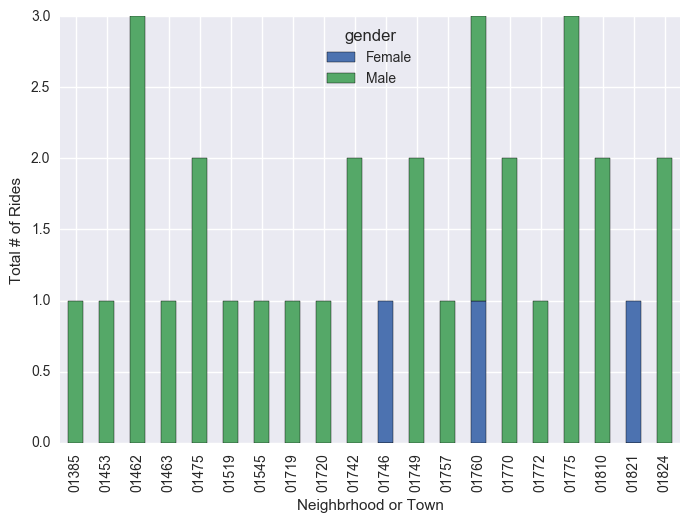

In [6]:
df_trips['zip_code'] = map(str,df_trips['zip_code'].values)
group_zip_gender_count = df_trips.groupby(['zip_code', 'gender'])['bike_nr'].count().unstack('gender').fillna(0)
group_zip_gender_count.head(20).plot(kind='bar', stacked=True)
group_zip_gender_count.head(20).to_csv('analysis3_2.csv')
plt.xlabel('Neighbrhood or Town')
plt.ylabel("Total # of Rides")
plt.savefig(os.path.join("..",'extra','analysis3_1.png'),bbox_inches='tight')
plt.show()